# 📘 Title:
# Building and Comparing Linear Regression Models to Predict CO₂ Emissions

# 📝 Description:
In this project, I work with a fuel consumption dataset that contains specifications of light-duty vehicles sold in Canada. My goal is to build and compare two linear regression models to predict CO₂ emissions (g/km) based on vehicle characteristics.

I begin with Exploratory Data Analysis (EDA) to understand the data distributions and correlations between variables. Then, I build two models:

A Simple Linear Regression model using a single feature: Engine Size

A Multiple Linear Regression model using three features: Engine Size, Cylinders, and Fuel Consumption Combined

By comparing the performance of these models, I aim to demonstrate the impact of feature selection on prediction accuracy. This project highlights my ability to clean data, explore relationships, build regression models, and evaluate them using Python’s data science libraries.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df=pd.read_csv("C:/Users/knowl/OneDrive/Desktop/FuelConsumption.csv")

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.shape

(1067, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [14]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [16]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# EDA

# Distribution of CO2 Emissions


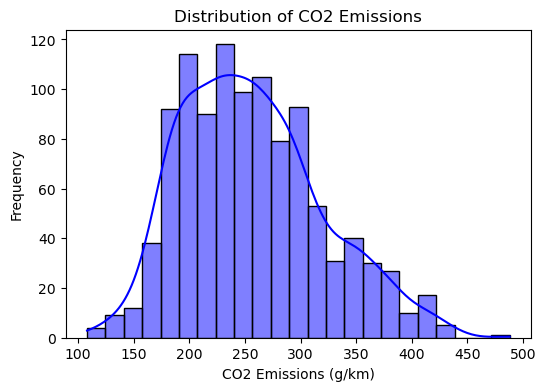

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["CO2EMISSIONS"], kde=True, color='blue')
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.show()

The chart presents a histogram showing the distribution of CO₂ emissions (measured in grams per kilometer, g/km) across a sample of vehicles. A blue kernel density estimation (KDE) curve is overlaid to illustrate the smoothed probability distribution.

Key Observations:

- The majority of vehicles emit between 180 and 300 g/km, with the highest frequency around 220–260 g/km.

- The distribution is right-skewed, indicating that while most vehicles have moderate emissions, a smaller number produce significantly higher CO₂ emissions (up to ~500 g/km).

- There are fewer vehicles with emissions below 150 g/km or above 400 g/km.

- The shape suggests that while emission regulations may push most vehicles toward a standard range, some outliers with high emissions remain.

# Correlation Heatmap

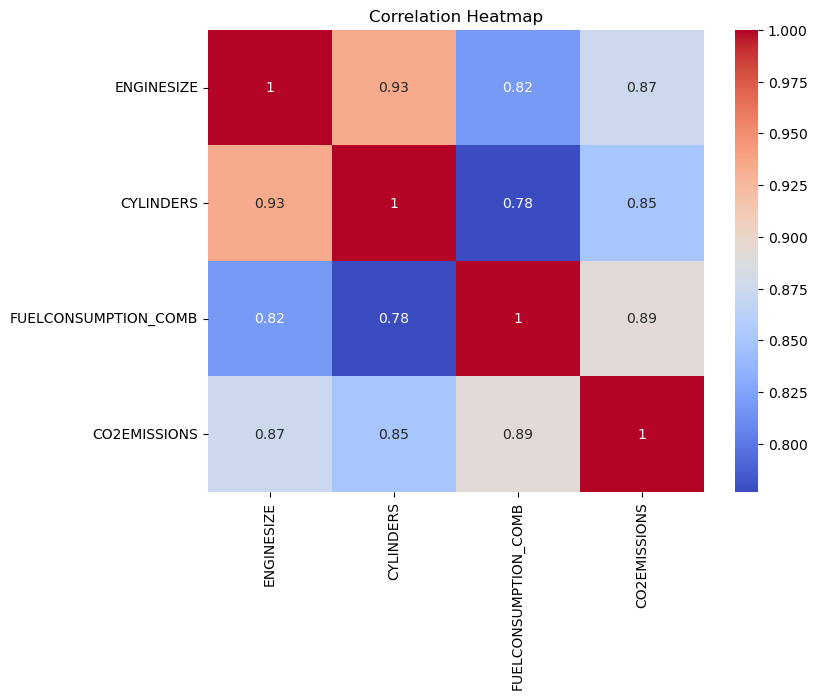

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- ENGINESIZE and CYLINDERS show a very strong positive correlation (0.93), which is expected since more cylinders typically mean a larger engine.

- FUELCONSUMPTION_COMB and CO2EMISSIONS have the strongest correlation in the chart (0.89), suggesting that as fuel consumption increases, CO₂ emissions also increase significantly.

- ENGINESIZE and CO2EMISSIONS are also strongly correlated (0.87), indicating that larger engines tend to produce more emissions.

All variables are strongly positively correlated, reinforcing that these features collectively influence fuel usage and CO₂ output.

Interpretation:

- This heatmap confirms that engine size, fuel consumption, and number of cylinders are critical predictors of CO₂ emissions, making them valuable inputs for regression or machine learning models targeting environmental impact predictions.

# Pairplot

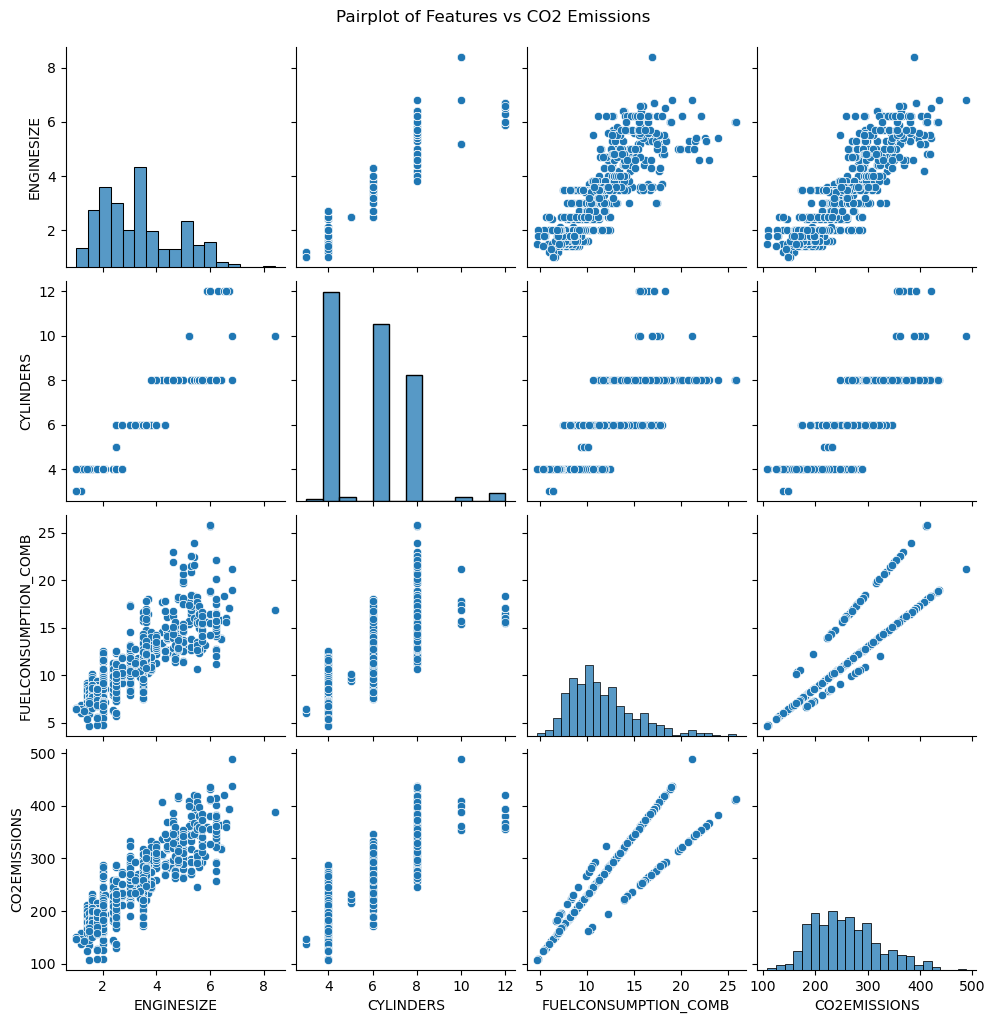

In [28]:
sns.pairplot(df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]])
plt.suptitle("Pairplot of Features vs CO2 Emissions", y=1.02)
plt.show()

1- ENGINESIZE vs CO2EMISSIONS

A clear positive linear trend: larger engines tend to emit more CO₂.

2- FUELCONSUMPTION_COMB vs CO2EMISSIONS

This relationship is almost perfectly linear, indicating that higher fuel consumption leads to higher CO₂ emissions — which is expected.

3- CYLINDERS vs CO2EMISSIONS

Though more discrete (as cylinders are count-based), there is a stepwise increase in emissions with increasing cylinder count.

4- ENGINESIZE vs FUELCONSUMPTION_COMB

Strong positive correlation: larger engines tend to consume more fuel.

5- CYLINDERS vs ENGINESIZE

Distinct clusters show that more cylinders are strongly associated with larger engine sizes.

6- Diagonal histograms

Show the distribution of each variable, with ENGINESIZE and FUELCONSUMPTION_COMB showing skewness, while CYLINDERS is discrete and CO2EMISSIONS is slightly right-skewed.



The dataset is clean with no missing values, i will now prepare the dataframe for modeling.

In [32]:
# Select only relevant numeric columns
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]


In [34]:
# Split the data
X = cdf[["ENGINESIZE"]]
y = cdf["CO2EMISSIONS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict
y_pred = simple_model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Evaluation
print("Simple Linear Regression:")
print("Coefficient:", simple_model.coef_[0])
print("Intercept:", simple_model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


Simple Linear Regression:
Coefficient: 38.99297872443403
Intercept: 126.28970217408735
R² Score: 0.7615595731934373
RMSE: 31.399652374309817


# Model Parameters:
Coefficient (Slope): 38.99
- For every 1-unit increase in the independent variable, the predicted outcome increases by approximately 38.99 units.

Intercept: 126.29
- This is the expected value of the dependent variable when the independent variable is 0.

# Model Evaluation

R² Score: 0.7616
- Approximately 76.16% of the variance in the target variable is explained by this model. This indicates a strong linear relationship.

Root Mean Squared Error (RMSE): 31.40
- On average, the model's predictions deviate from the actual values by about 31.4 units. Lower values indicate better model accuracy.

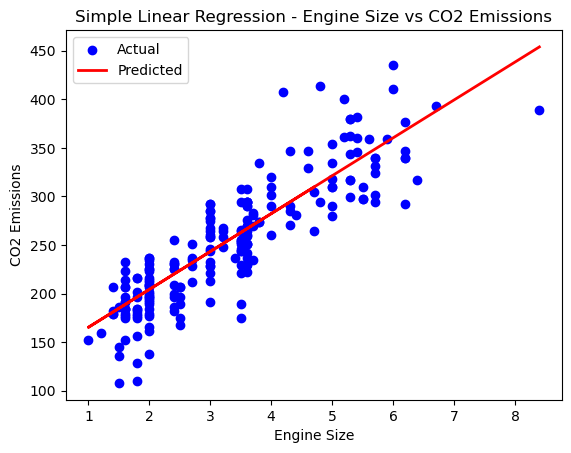

In [42]:
# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Simple Linear Regression - Engine Size vs CO2 Emissions")
plt.legend()
plt.show()

- Blue dots represent the actual observed CO₂ emissions for different engine sizes in the dataset. Red line is the regression line showing the model’s predicted emissions based on engine size.

- The regression line shows a strong positive linear trend, indicating that larger engine sizes are associated with higher CO₂ emissions.

- The data points are fairly close to the red line, supporting the model's goodness of fit — consistent with the earlier R² score of ~0.76.

- While the model captures the general trend well, there is visible variance and spread around the line, suggesting that other factors (besides engine size) also influence CO₂ emissions.

# Using 3 Predictors

In [53]:
X_multi = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y_multi = cdf["CO2EMISSIONS"]

In [55]:
# Split the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [57]:

# Train the model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

LinearRegression()

In [59]:
# Predict
y_pred_m = multi_model.predict(X_test_m)

In [65]:
from sklearn.metrics import r2_score, root_mean_squared_error

print("\nMultiple Linear Regression:")
print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)
print("R² Score:", r2_score(y_test_m, y_pred_m))
print("RMSE:", root_mean_squared_error(y_test_m, y_pred_m))



Multiple Linear Regression:
Coefficients: [11.2094395   7.15561381  9.5208118 ]
Intercept: 67.34838518362102
R² Score: 0.8759705206914069
RMSE: 22.646305151499448


This output presents the evaluation results of a multiple linear regression model used to predict a target variable (e.g., CO₂ emissions) based on multiple input features (engine size, cylinders, fuel consumption).

 Model Parameters:
Coefficients: [11.21, 7.16, 9.52]
→ These values represent the impact of each input feature on the target. For every unit increase in a given feature, the predicted output increases by the respective coefficient, holding other variables constant.

Intercept: 67.35
→ This is the predicted value of the target variable when all features are zero. While not usually meaningful on its own, it is necessary for calculating predictions.

Model Performance Metrics:
R² Score: 0.876
→ The model explains approximately 87.6% of the variance in the target variable, indicating a strong linear relationship between the predictors and the outcome.

Root Mean Squared Error (RMSE): 22.65
→ On average, the model’s predictions differ from actual values by approximately 22.65 units. Lower RMSE indicates better prediction accuracy.

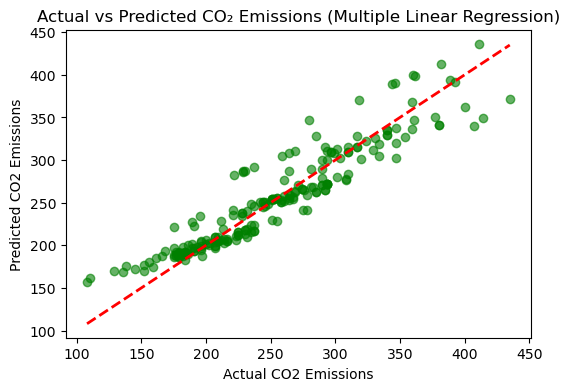

In [69]:
# Actual vs Predicted Plot for Multiple Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test_m, y_pred_m, color="green", alpha=0.6)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO₂ Emissions (Multiple Linear Regression)")
plt.show()


- The majority of green dots are clustered around the red line, indicating that the model is performing well — most predictions are close to the actual values.

- The spread around the line is minimal, supporting the high R² score (0.876) and low RMSE (~22.65) you observed earlier.

- This plot shows that the model is well-calibrated, without strong systematic bias

# Conclusion

In this project, I first conducted exploratory data analysis (EDA) to understand the distribution and relationships among vehicle features and CO2 emissions. I then built a Simple Linear Regression model using Engine Size as the predictor. To enhance predictive performance, I extended the analysis with a Multiple Linear Regression model using Engine Size, Cylinders, and Fuel Consumption Combined. This allowed for improved accuracy and deeper understanding of how these features contribute to CO2 emissions. The progression from simple to multiple regression demonstrates practical application of supervised learning in environmental impact assessment.